# Salary Predictions Based on Job Descriptions EDA 📊

This project aims to build a predictive model that provides salary estimates based on their job type (title), location, years of experience and education level. This models uses over 100000 inputs. This model not only provides useful salary esitmates but also provides useful information that can maximize your salary, as well as the most common, highest paying jobs and indemand career paths. This model helps people to make more informed decisions and negotiate salary based on their market value and job location. 

- __Author__ : "Shreya Shrestha"
- [__Email__](shreyashrestha995@gmail.com)
- [__LinkedIn__](https://www.linkedin.com/in/iamshreyashrestha/)

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import warnings
warnings.filterwarnings("ignore")

### 1. Load the data into Pandas Dataframe

In [2]:
#training Dataframes
train_features = pd.read_csv('train_features.csv')
train_salaries = pd.read_csv('train_salaries.csv')

#testing Dataframe
test_df = pd.read_csv('test_features.csv')

#### To examine the data

In [3]:
#to view top 5 rows of the train_features dataframe and it's shape
display(train_features.head())
print(train_features.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


(1000000, 8)


In [4]:
#to view top 5 rows of the test_features dataframe and it's shape
display(test_df.head())
print(test_df.shape)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


(1000000, 8)


#### Merge the train_feature and train_salaries

In [5]:
train_df = train_features.merge(train_salaries, on='jobId', how = 'left')

### 2. Feature Engineering

- **Checking for duplicates**
- **Checking for missing values**
- **Checking for outliers and removing them**
- **Remove the unique identifiers in the dataframe.**

####  Checking for duplicates

In [6]:
train_df.duplicated().sum()

0

In [7]:
test_df.duplicated().sum()

0

` There are no duplicate values in the train and test dataframes `

#### Checking for missing values

In [8]:
train_df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [9]:
test_df.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

#### Checking for outliers

`Vizualize Salary (traget variable) using box plot and look for outliers`

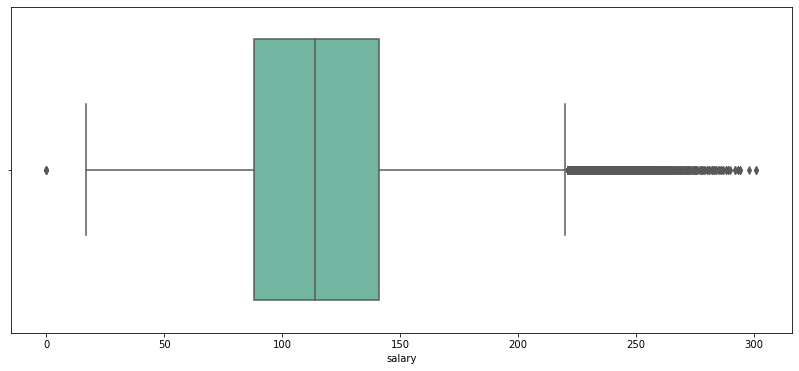

In [10]:
plt.figure(figsize = (14, 6))
sns.boxplot(train_df.salary, palette="Set2")
plt.savefig('target_variable.png')
plt.show()

` From this boxplot we can see that there are some outliers in this dataset. `

#### Now using the IQR rule to identify potential outliers

In [11]:
Q1, Q3 = np.percentile(train_df.salary, [25,75])
IQR = Q3 - Q1
upperbound = Q3 + 1.5*IQR
lowerbound = Q1 - 1.5*IQR

print('The upper and lower bound salary for potential outliers are ${} and ${}.'.format(upperbound, lowerbound))

The upper and lower bound salary for potential outliers are $220.5 and $8.5.


#### To examine potential outliers according to IQR ruel

In [12]:
# Salary below the lower bound
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [13]:
train_df.loc[train_df.salary < 8.5, 'jobType'].value_counts()

JUNIOR            2
MANAGER           1
VICE_PRESIDENT    1
CTO               1
Name: jobType, dtype: int64

In [14]:
# Salary greater than upper bound
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233


In [15]:
train_df.loc[train_df.salary > 220.5, 'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [16]:
# To look for candidates with upperbound salary andjobType = JUNIOR
train_df[(train_df.salary > 220.5) & (train_df.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [17]:
# to look for candidates who have upper bound salary and degree = NONE
train_df[(train_df.salary > 220.5) & (train_df.degree == 'NONE')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
7233,JOB1362684414920,COMP23,CFO,NONE,NONE,OIL,23,5,229
8174,JOB1362684415861,COMP37,CEO,NONE,NONE,OIL,15,1,236
9048,JOB1362684416735,COMP16,CTO,NONE,NONE,OIL,23,13,221
13160,JOB1362684420847,COMP24,CEO,NONE,NONE,FINANCE,20,11,224
15987,JOB1362684423674,COMP59,VICE_PRESIDENT,NONE,NONE,WEB,24,2,228
...,...,...,...,...,...,...,...,...,...
959248,JOB1362685366935,COMP2,CFO,NONE,NONE,FINANCE,24,18,230
967624,JOB1362685375311,COMP46,CEO,NONE,NONE,WEB,22,17,231
992175,JOB1362685399862,COMP33,CFO,NONE,NONE,WEB,24,2,222
993181,JOB1362685400868,COMP56,CFO,NONE,NONE,OIL,24,1,242


` Even non-degree holder have upperbound salary. They are mostly C-suites working on highpaying idustires like Oil, Finance and Web therefore these data looks legitimate. ` 

` The lower-bound outliers have salary of zero. These salary entries appers to be for positions like junior, CTO, manager and vice president. These entries can be classifed as corrupt data and should be removed from the training set.`

` However, the upper bound outliers seems to legitimate data because these high salaries (> $220.5k) are mostly for the C-suite roles. Some junior positions seems to have high salary because they work for high paying industries such as Oil and Finance. ` 

#### To remove the lower bound outliers from the training set

In [18]:
# Removing data with 0 salary
train_df = train_df[train_df.salary > 8.5]

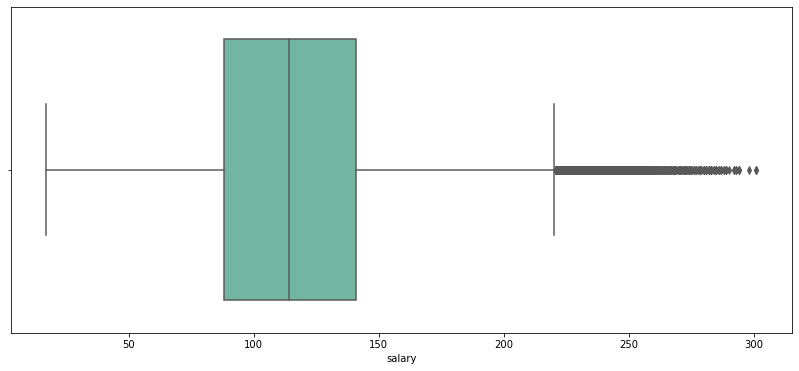

In [19]:
plt.figure(figsize = (14, 6))
sns.boxplot(train_df.salary, palette="Set2")
plt.show()

#### Checking if there are any unique identifiers in the dataset

In [20]:
train_df.iloc[:,:].nunique(dropna=False)

jobId                  999995
companyId                  63
jobType                     8
degree                      5
major                       9
industry                    7
yearsExperience            25
milesFromMetropolis       100
salary                    279
dtype: int64

` We can see that jobId is the unique identifier since it contains unique values`

` We need to remove the atrributes with unique values.`

In [21]:
train_df = train_df.drop(columns = ['jobId'])

In [22]:
train_df.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


### 3. Exploratory Data Analysis (EDA)

#### Exploring each feature 

#### i. Company ID

In [23]:
train_df['companyId'].value_counts().sort_values

<bound method Series.sort_values of COMP39    16193
COMP35    16114
COMP59    16066
COMP30    16041
COMP3     16028
          ...  
COMP17    15715
COMP0     15666
COMP2     15641
COMP8     15638
COMP57    15635
Name: companyId, Length: 63, dtype: int64>

`The number of employess per company ranges from 15635 to 16114. We can conclude that this dataset contains data of all the large companies. This means that our predictive model might not be able to predict the salaries of mid size or small organizations. `

In [24]:
train_df[['companyId', 'salary']].groupby(['companyId']).agg(np.mean)

,salary
companyId,
COMP0,115.963615
COMP1,116.048609
COMP10,116.019800
COMP11,116.113029
COMP12,116.086485
...,...
COMP61,116.318607
COMP62,116.279872
COMP7,115.888501


` All the companies seem to have similar average salary, and similar distribution across the dataset.`

#### ii. Job Type

<function matplotlib.pyplot.show(*args, **kw)>

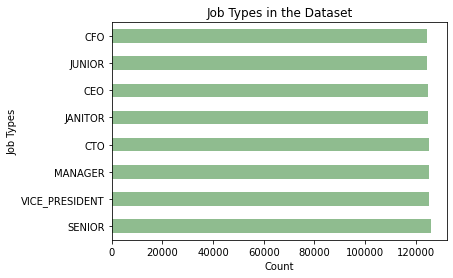

In [25]:
train_df.jobType.value_counts().plot(kind = 'barh', color = 'darkseagreen')
plt.title('Job Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Job Types')
plt.savefig('jobtype.png')
plt.show

` All the job types have same count. `

In [26]:
train_df.groupby(['jobType', 'degree']).agg([np.mean, np.std])

yearsExperience           milesFromMetropolis  \
                                      mean       std                mean   
jobType        degree                                                      
CEO            BACHELORS         12.002508  7.209675           49.235760   
               DOCTORAL          12.001551  7.227637           49.489123   
               HIGH_SCHOOL       12.006068  7.210640           49.846527   
               MASTERS           11.992568  7.189323           49.573219   
               NONE              11.988634  7.241517           49.252390   
CFO            BACHELORS         11.991634  7.206442           49.483449   
               DOCTORAL          11.951411  7.214436           49.807831   
               HIGH_SCHOOL       11.987396  7.212928           49.381784   
               MASTERS           11.999801  7.218632           49.528987   
               NONE              12.021810  7.262770           49.664805   
CTO            BACHELORS         11.991300  7.244813           49.609810   
               DOCTORAL          11.999920  7.198437           49.614526   
               HIGH_SCHOOL       12.001607  7.195336           49.451251   
               MASTERS           11.982841  7.207408           49.487210   
               NONE              12.079254  7.203216           49.742786   
JANITOR        HIGH_SCHOOL       11.974498  7.219081           49.305925   
               NONE              11.964825  7.204067           49.581447   
JUNIOR         BACHELORS         11.968760  7.198961           49.873231   
               DOCTORAL          11.991647  7.253500           49.616547   
               HIGH_SCHOOL       11.983174  7.197517           49.537919   
               MASTERS           12.012279  7.187316           49.865856   
               NONE              12.006214  7.186412           49.409628   
MANAGER        BACHELORS         11.954513  7.195049           49.570709   
               DOCTORAL          11.998118  7.207633           49.680498   
               HIGH_SCHOOL       12.014340  7.208562           49.313236   
               MASTERS           11.971051  7.224278           49.447272   
               NONE              11.998605  7.202755           49.479834   
SENIOR         BACHELORS         12.020223  7.203083           49.926574   
               DOCTORAL          12.074983  7.214769           49.452658   
               HIGH_SCHOOL       12.016502  7.219094           49.502012   
               MASTERS           11.954967  7.207399           49.562673   
               NONE              11.915834  7.214111           49.416570   
VICE_PRESIDENT BACHELORS         11.972855  7.269277           49.427599   
               DOCTORAL          12.003606  7.185796           49.607553   
               HIGH_SCHOOL       12.012261  7.211695           49.567993   
               MASTERS           11.981932  7.191759           49.415895   
               NONE              11.997664  7.217306           49.117019   

                                           salary             
                                  std        mean        std  
jobType        degree                                         
CEO            BACHELORS    28.831401  148.421009  33.361200  
               DOCTORAL     28.865378  158.232849  34.448793  
               HIGH_SCHOOL  28.979459  135.629182  31.071963  
               MASTERS      28.941607  153.254510  34.069260  
               NONE         28.952217  130.796690  30.873326  
CFO            BACHELORS    29.000281  138.508706  32.192597  
               DOCTORAL     28.909401  148.308742  33.198258  
               HIGH_SCHOOL  29.008106  125.964395  29.764747  
               MASTERS      28.911509  143.316243  32.382933  
               NONE         28.797161  121.135389  29.407701  
CTO            BACHELORS    28.857209  138.363172  31.841512  
               DOCTORAL     28.778752  148.269262  33.027200  
               HIGH_SCHOOL  28.873617  12

`We can see that there are some Vice Presidents, CEO, CFO and Managers without degree. Either this is the case of missing data or we can assume that we dont necesserily need a degree to have a C-suite role.`

#### iii. Degree

<function matplotlib.pyplot.show(*args, **kw)>

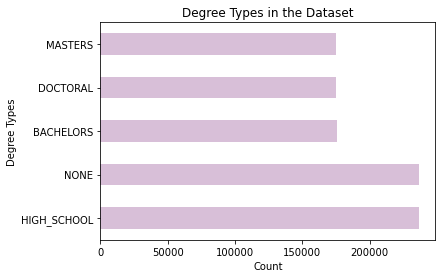

In [27]:
train_df.degree.value_counts().plot(kind = 'barh', color = 'thistle')
plt.title('Degree Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Degree Types')
plt.savefig('degreetype.png')
plt.show

` We can see that we have more anount of High School and Non degree holders in the dataset. `

#### iv. Major

<function matplotlib.pyplot.show(*args, **kw)>

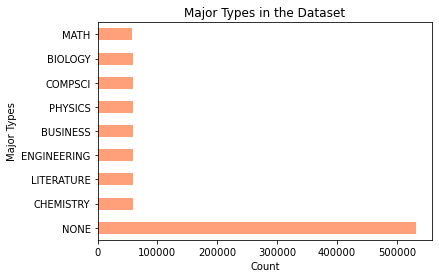

In [28]:
train_df.major.value_counts().plot(kind = 'barh', color = 'lightsalmon')
plt.title('Major Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Major Types')
plt.savefig('majortypes.png')
plt.show

`There are 9 majors listed in the dataset. Majority of the people in the dataset do not have a major listed. `

#### v. Industry

<function matplotlib.pyplot.show(*args, **kw)>

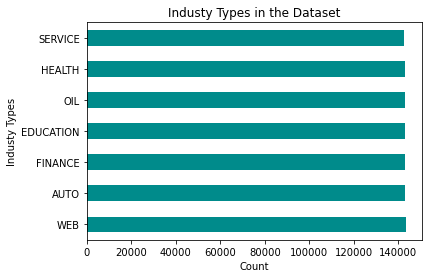

In [29]:
train_df.industry.value_counts().plot(kind = 'barh', color = 'darkcyan')
plt.title('Industy Types in the Dataset')
plt.xlabel('Count')
plt.ylabel('Industy Types')
plt.savefig('industrytype.png')
plt.show

`There are 7 types of industies in this dataset and all of them have the same count. `

#### vi. Years Experience

In [30]:
train_df.yearsExperience.value_counts().sort_values

<bound method Series.sort_values of 15    40312
1     40264
9     40235
3     40190
22    40187
8     40118
6     40094
18    40088
17    40072
7     40047
2     40045
4     40036
10    40032
23    40015
5     40013
20    39988
11    39948
16    39873
19    39860
24    39860
0     39839
14    39827
13    39826
21    39759
12    39467
Name: yearsExperience, dtype: int64>

` yearExperience is evenly distributed in the dataset. `

#### vii. Miles from metropolis

In [31]:
train_df.milesFromMetropolis.value_counts().sort_values

<bound method Series.sort_values of 99    10180
62    10175
63    10159
97    10155
41    10147
      ...  
26     9845
6      9839
18     9824
87     9815
20     9807
Name: milesFromMetropolis, Length: 100, dtype: int64>

#### To vizualize the distribution of the traget variable

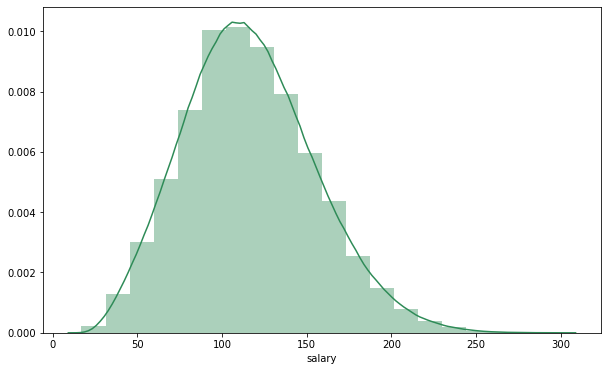

In [32]:
plt.figure(figsize = (10,6))
sns.distplot(train_df.salary, bins = 20, color = 'seagreen')
plt.savefig('targetvar_dist.png')
plt.show()

`We can see that the target variable 'Salary' has a Normal Distribution. `

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   companyId            999995 non-null  object
 1   jobType              999995 non-null  object
 2   degree               999995 non-null  object
 3   major                999995 non-null  object
 4   industry             999995 non-null  object
 5   yearsExperience      999995 non-null  int64 
 6   milesFromMetropolis  999995 non-null  int64 
 7   salary               999995 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 108.7+ MB


In [34]:
numerical = list(train_df.dtypes[train_df.dtypes != 'object'].index)
print('Numerical variables:')
print(numerical)
categorical = list(train_df.dtypes[train_df.dtypes == 'object'].index)
print('\nCategorical variables:')
print(categorical)

Numerical variables:
['yearsExperience', 'milesFromMetropolis', 'salary']

Categorical variables:
['companyId', 'jobType', 'degree', 'major', 'industry']


#### Function to plot features

In [35]:
def plot_feature(df, col):
    '''
    This function prints each feature to the left and the distribution samples to the right
    '''
    plt.figure(figsize = (14, 6))
    plt.subplot(1, 2, 1)
    if df[col].dtype == 'int64':
        df[col].value_counts().sort_index().plot()
    else:
        #change the categorical variable to category type and order their level by the mean salary
        #in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        mean.sort_values().plot(kind = 'bar', color = 'lightcoral')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)

    if df[col].dtype == 'int64' or col == 'companyId':
        #plot the mean salary for each category and fill between the (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot(color = 'red')
        plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
    else:
        sns.boxplot(x = col, y = 'salary', data=df, palette = 'Set2')
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

#### i. yearsExperience and salary

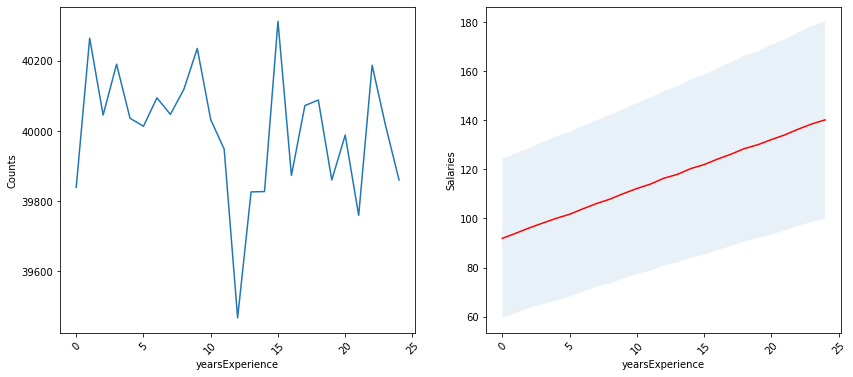

In [36]:
plot_feature(train_df, 'yearsExperience')

` We can see a positive correlation between Salary and years of experince. `

` Higher the years of job experience, higher the salary. ` 

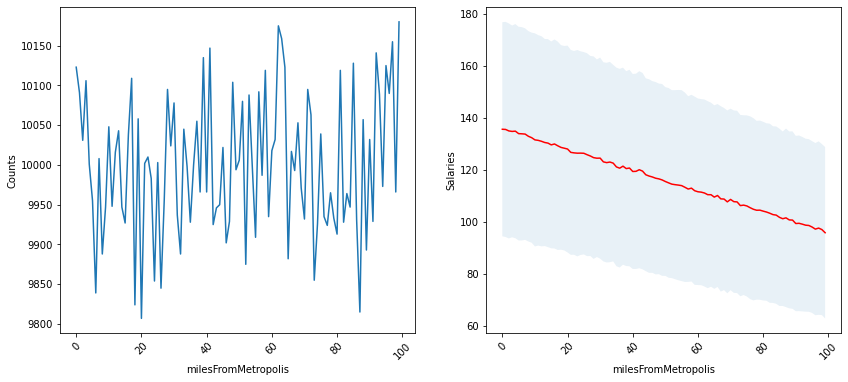

In [37]:
plot_feature(train_df, 'milesFromMetropolis')

` We can see a negative correlation between salary and milesFromMetropolis.`

` So, the futher away you are from the metropolitian city, the lower your salary will be. `

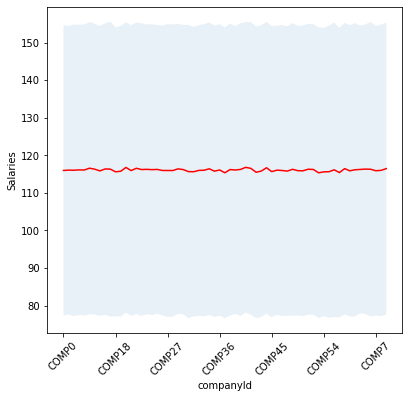

In [38]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
mean = train_df.groupby('companyId')['salary'].mean()
std = train_df.groupby('companyId')['salary'].std()
mean.plot(color = 'red')
plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
plt.xticks(rotation=45)
plt.ylabel('Salaries')
plt.show()

` There is no correlation between salary and companiId. `

` We can see a flat cure which means all the companies have the same average salaries. `

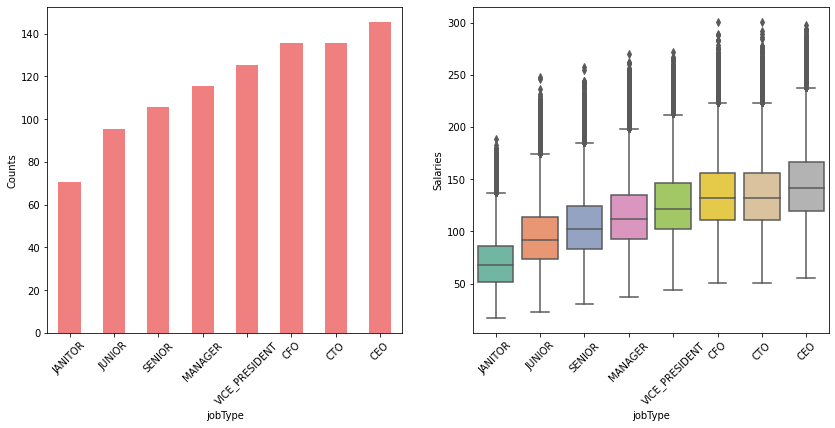

In [39]:
plot_feature(train_df, 'jobType')

` We can see a positive correlation between salary and jobType. `

` The higher the job position, the higher the salary. `

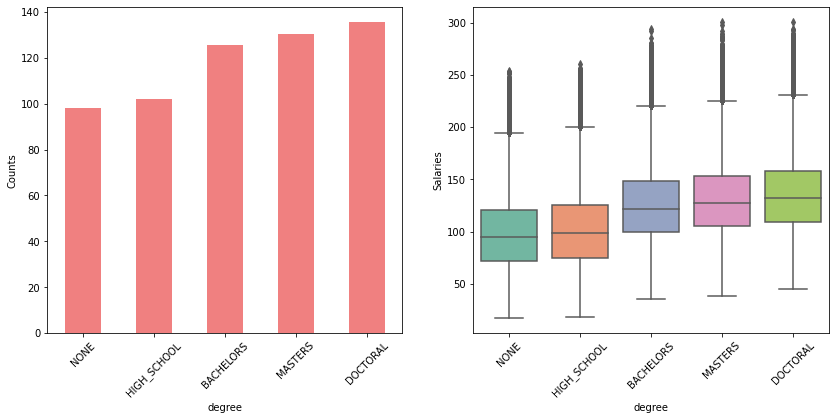

In [40]:
plot_feature(train_df, 'degree')

`More advanced degrees like Doctorate and Masters tend to correspond to higher salaries. `

`Surpringly, even non degree holders have a decent salary. by looking at this plot we can conclude that a degree is not always required to have a good salary. `

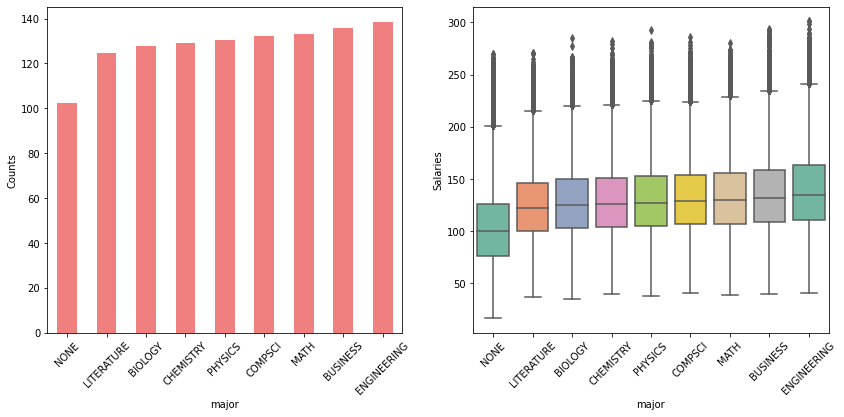

In [41]:
plot_feature(train_df, 'major')

` People with Engineering, Business and Math majors have the highest salaries. `

` Surprisingly, even people with no major have a decent salary. This might possibly be the case of missing data. `

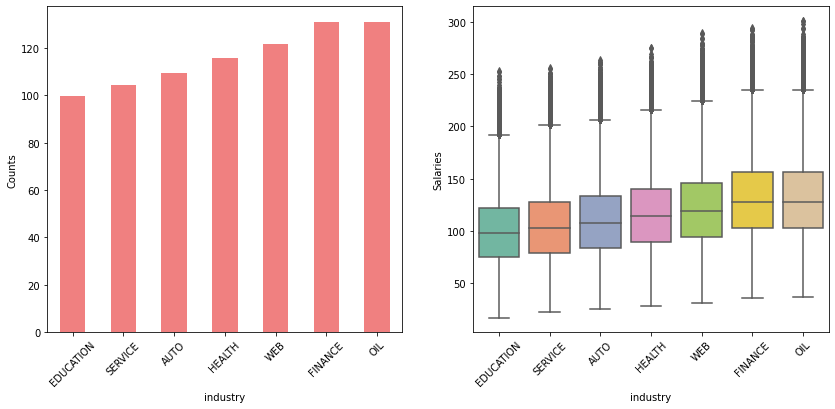

In [42]:
plot_feature(train_df, 'industry')

`Oil, finance and web industries generally pay better compared to other industries. `

`Eduaction and Serive roles have lower salary.`

In [43]:
train_df[(train_df.salary > upperbound) & (train_df.industry == 'EDUCATION')].sample(25)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
708297,COMP2,CFO,MASTERS,LITERATURE,EDUCATION,23,18,221
479938,COMP61,CFO,DOCTORAL,LITERATURE,EDUCATION,21,5,245
365300,COMP25,CEO,MASTERS,MATH,EDUCATION,24,40,221
362548,COMP48,CEO,DOCTORAL,LITERATURE,EDUCATION,21,24,224
926698,COMP21,CFO,DOCTORAL,CHEMISTRY,EDUCATION,24,12,223
677944,COMP48,CEO,BACHELORS,ENGINEERING,EDUCATION,24,15,229
282689,COMP33,CTO,DOCTORAL,CHEMISTRY,EDUCATION,24,2,228
852286,COMP62,CEO,MASTERS,PHYSICS,EDUCATION,20,5,222
497540,COMP45,CEO,MASTERS,BUSINESS,EDUCATION,22,6,221
348503,COMP49,CEO,DOCTORAL,BUSINESS,EDUCATION,23,4,232


In [44]:
train_df[(train_df.salary > upperbound) & (train_df.industry == 'SERVICE')].sample(25)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
419596,COMP39,CFO,DOCTORAL,ENGINEERING,SERVICE,24,3,246
243964,COMP55,CFO,DOCTORAL,CHEMISTRY,SERVICE,22,21,233
239089,COMP29,CEO,BACHELORS,ENGINEERING,SERVICE,24,5,227
362112,COMP55,CEO,MASTERS,MATH,SERVICE,23,37,235
999280,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228
316655,COMP33,CEO,BACHELORS,CHEMISTRY,SERVICE,24,20,242
988373,COMP13,CEO,DOCTORAL,BUSINESS,SERVICE,22,32,222
423285,COMP48,CEO,DOCTORAL,BUSINESS,SERVICE,17,20,230
151378,COMP45,CTO,MASTERS,COMPSCI,SERVICE,24,21,223
18370,COMP42,CFO,MASTERS,BUSINESS,SERVICE,18,32,227


` The lowest paying industries - Education and Services can have upper bound salary if the have 15+ years of experice. `

#### Multivariate Analysis 

In [64]:
numerical = ['yearsExperience', 'milesFromMetropolis']
categorical = ['companyId', 'jobType', 'degree', 'major', 'industry']
targetvar = ['salary']
print('Numerical variables:')
print(numerical)
print('\nCategorical variables:')
print(categorical)
print('\nTarget variables:')
print(targetvar)

Numerical variables:
['yearsExperience', 'milesFromMetropolis']

Categorical variables:
['companyId', 'jobType', 'degree', 'major', 'industry']

Target variables:
['salary']


In [65]:
def label_encode(df, col):
    """
    Function to convert each categorical variable by replacing and 
    using the average salary of that category
    """
    dict = {}
    categorical = df[col].cat.categories.tolist()
    for cat in categorical:
        dict[cat] = train_dfcopy[train_dfcopy[col] == cat]['salary'].mean()
    df[col] = df[col].map(dict)

In [67]:
train_dfcopy = train_df.copy()

In [68]:
train_dfcopy.head()

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [69]:
train_dfcopy.dtypes

companyId                object
jobType                category
degree                 category
major                  category
industry               category
yearsExperience           int64
milesFromMetropolis       int64
salary                    int64
dtype: object

In [70]:
train_dfcopy['companyId'] = train_dfcopy['companyId'].astype('category')

In [71]:
for col in train_dfcopy.columns:
    if train_dfcopy[col].dtype.name == 'category':
        label_encode(train_dfcopy, col)
        train_dfcopy[col] = train_dfcopy[col].astype('int64')

In [55]:
train_dfcopy.head(15)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,115,135,130,133,115,10,83,130
1,115,145,101,102,121,3,73,101
2,116,125,135,130,115,10,38,137
3,116,115,135,129,109,8,17,142
4,115,125,125,130,130,8,16,163
5,115,115,135,132,130,2,31,113
6,115,135,98,102,115,23,24,178
7,116,95,125,129,99,9,70,73
8,115,70,101,102,99,1,54,31
9,116,125,125,129,109,17,68,104


#### To create a correlation matrix to show the relationships between each variable

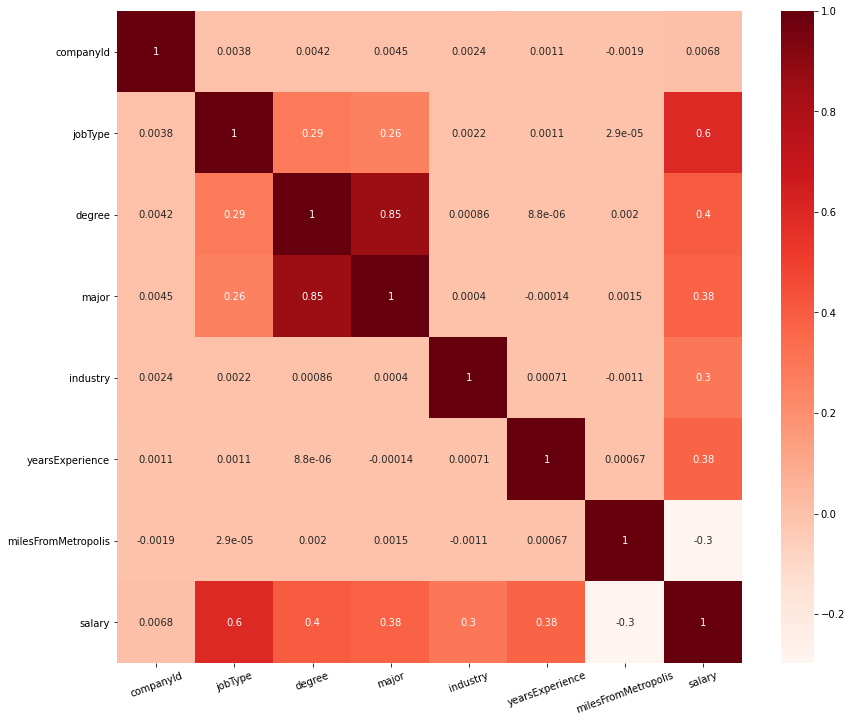

In [74]:
corr_matrix = train_dfcopy.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.xticks(rotation=20)
plt.yticks(rotation=0)
plt.show()

` Based on the correlation heatmap above, we can note the following things. `
- jobType is the most strongly correlated to salary, followed by degree, major, yearsExperience
- milesFromMetropolis has a negative correlation with salary 

### 4. Baseline

`To extablish a baseline using Measn Squeared Error (MSE)`

` We calculate the MSE by measuring the actual salary against the average salary per industry. `

#### Merging average mean salary per industry with the training dataframe

In [75]:
avgIndex_df = pd.DataFrame(train_dfcopy.groupby('industry')['salary'].mean())
base_df = train_dfcopy.merge(avgIndex_df, on = 'industry', how = 'inner')

In [76]:
base_df.head(10)

,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary_x,salary_y
0,115,135,130,133,115,10,83,130,115.73554
1,116,125,135,130,115,10,38,137,115.73554
2,115,135,98,102,115,23,24,178,115.73554
3,116,70,101,102,115,24,30,102,115.73554
4,115,95,125,124,115,18,69,105,115.73554
5,116,95,98,102,115,20,63,76,115.73554
6,116,95,125,130,115,23,2,159,115.73554
7,115,135,125,130,115,18,32,132,115.73554
8,116,95,130,133,115,12,78,100,115.73554
9,115,115,135,102,115,15,14,164,115.73554


In [77]:
mse = mean_squared_error(base_df['salary_x'], base_df['salary_y'])
print(f'The baseline model Mean Squared Error is: {mse}')

The baseline model Mean Squared Error is: 1367.1259871233935


#### Now calculating Root Mean Squared Error

In [78]:
rmse = round(math.sqrt(mse),3)
print("Baseline root MSE", rmse)

Baseline root MSE 36.975


` The MSE is excessively high, which means this model might not be able to predict the data accurately. `

` Our model aims to bring the MSE down to 360. `

#### Using 5-fold cross validation to calculate the negative MSE using Liner Regression

In [79]:
model = LinearRegression()

# splitting the dataframe into x and y
x = base_df.iloc[:,:7]
y = base_df.iloc[:,7]

cvResult = cross_val_score(model, x, y, cv = 5, scoring = 'neg_mean_squared_error')
mean_mse = -1 * np.mean(cvResult)
std_mse = np.std(cvResult)
print('5x cross-validation MSE', round(mean_mse, 2))
print('The standard deviation during cross-validation is', round(std_mse, 2))

5x cross-validation MSE 400.02
The standard deviation during cross-validation is 49.2


#### Summary

#### 5. Hypothesizing the solution

Given the information we have about our data. 

**These are the models I propose to predict the salary are:**

- **Linear Regression:** From the EDA, we have seen that both the numerical and most of the categorical variable have a liner correlation with the target variable 'salary'. Based on those factors a liner modle would be suitable for this dataset.  
    
    
- **Random Forest:** Random Forest would be a good model for this dataset because it would be able to handle the categorical data well. This model also reduces overfitting and helps to improve the accuracy. Random forest is also a flexible model for both classifiaction and regression problems.
    
    
    
- **Gradient-boost:** Gradient boosting has lots of flexibility. It can optimize on different loss functions and provides several hyper parameter tuning options that make the function fit very flexible.

**The step I am planning to take to improve the model accuracy and decrease the MSE are:**

- Apply feature engineering like one-hot encoding for categorical variabes 
- Normalize the numerical to scale the data
- Hypertune the parameters to enhance the accuracy
- Use Principal Component Analysis(PCA) to futher enhance the accuracy of the model

### To view the modelling process, please check out Salary_Prediction notebook